In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import mean_squared_error
from sklearn import metrics

In [ ]:
dataset=pd.read_csv("Consommation-autos.txt",delimiter="\t")
dataset

,modele,prix,cylindree,puissance,poids,conso
0,Daihatsu Cuore,11600,846,32,650,5.7
1,Suzuki Swift 1.0 GLS,12490,993,39,790,5.8
2,Fiat Panda Mambo L,10450,899,29,730,6.1
3,VW Polo 1.4 60,17140,1390,44,955,6.5
4,Opel Corsa 1.2i Eco,14825,1195,33,895,6.8
5,Subaru Vivio 4WD,13730,658,32,740,6.8
6,Toyota Corolla,19490,1331,55,1010,7.1
7,Ferrari 456 GT,285000,5474,325,1690,21.3
8,Mercedes S 600,183900,5987,300,2250,18.7
9,Maserati Ghibli GT,92500,2789,209,1485,14.5


In [ ]:
dataset.isnull().sum()

In [ ]:
dataset.shape

(31, 6)

In [ ]:
dataset.info()

In [ ]:
dataset.describe()

,prix,cylindree,puissance,poids,conso
count,31.000000,31.000000,31.000000,31.000000,31.000000
mean,43755.645161,2093.677419,97.096774,1256.129032,9.954839
std,55065.257963,1152.356582,69.340875,360.753170,3.569018
min,10450.000000,658.000000,29.000000,650.000000,5.700000
25%,19820.000000,1390.000000,55.000000,1042.500000,7.250000
50%,28750.000000,1984.000000,85.000000,1155.000000,9.300000
75%,39395.000000,2455.500000,106.500000,1525.000000,11.650000
max,285000.000000,5987.000000,325.000000,2250.000000,21.300000


In [ ]:
print (dataset.shape[1])


6


In [ ]:
print(len(dataset['modele'].unique()))

31


In [ ]:
dataset['modele'] = pd.factorize(dataset['modele'])[0]
dataset['modele']

In [ ]:
dataset.head()

,modele,prix,cylindree,puissance,poids,conso
0,0,11600,846,32,650,5.7
1,1,12490,993,39,790,5.8
2,2,10450,899,29,730,6.1
3,3,17140,1390,44,955,6.5
4,4,14825,1195,33,895,6.8


<Axes: >

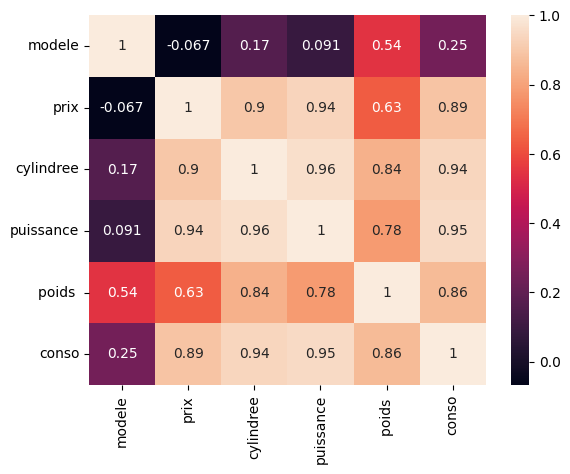

In [ ]:
sns.heatmap(dataset.corr(), annot=True)


In [ ]:
feature_names = ['prix', 'cylindree', 'puissance']
X = dataset[feature_names]
y=dataset['conso']
X

In [ ]:
from sklearn import datasets, linear_model
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3,random_state=42)

In [ ]:
print("x_train.", X_train.shape)
print("x_test.", X_test.shape)
print("y_train.", y_train.shape)
print("y_test.", y_test.shape)

x_train. (21, 3)
x_test. (10, 3)
y_train. (21,)
y_test. (10,)


In [ ]:
plt.plot(X['puissance'], y, 'bo')


In [ ]:
lm = linear_model.LinearRegression()  #build our model
model = lm.fit(X_train, y_train)   #fitting our data
predictions = model.predict(X_test)   #testing our model's performance

In [ ]:
predictions[0:10]

array([ 9.76126212,  9.68441195, 11.41843606,  7.70025505, 22.02457687,
       14.0115913 , 10.65365616,  9.10351821, 10.27716665,  6.15987002])

In [ ]:
y_test[0:10]

27     9.2
15     8.8
23    10.8
17     8.6
8     18.7
9     14.5
29    12.8
24     7.6
12    11.7
0      5.7
Name: conso, dtype: float64

In [ ]:
## The line / model
plt.scatter(y_test, predictions)
plt.xlabel("TrueValues")
plt.ylabel("Predictions")
plt.show()

In [ ]:
print("MSE", mean_squared_error(y_test,predictions))
print("R squared", metrics.r2_score(y_test,predictions))

MSE 2.2683852335517196
R squared 0.8235323909671615


# Polynomial regression

In [ ]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression

In [ ]:
lg=linear_model.LinearRegression()
poly=PolynomialFeatures(degree=3)

In [ ]:
x_train_fit = poly.fit_transform(X_train) #transforming our input data
lg.fit(x_train_fit, y_train)
X_test_=np.array(list(X_test))
x_test_ = poly.fit_transform(X_test)

predicted = lg.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  1714192.4321748544
R squared:  -133353.52702380932


In [ ]:
lg=LinearRegression()
poly=PolynomialFeatures(degree=2)
x_train_fit = poly.fit_transform(X_train) #transforming our input data
lg.fit(x_train_fit, y_train)
x_test_ = poly.fit_transform(X_test)
predicted = lg.predict(x_test_)
print("MSE: ", metrics.mean_squared_error(y_test, predicted))
print("R squared: ", metrics.r2_score(y_test,predicted))

MSE:  214.05569697966644
R squared:  -15.652328928589935


In [ ]:
print(y_test)
print(predicted)

27     9.2
15     8.8
23    10.8
17     8.6
8     18.7
9     14.5
29    12.8
24     7.6
12    11.7
0      5.7
Name: conso, dtype: float64
[  9.15112464   9.65752018  10.66753847   7.95280904 -27.44538305
  14.719684     9.90698529   8.30713009  10.67584466   5.84049528]


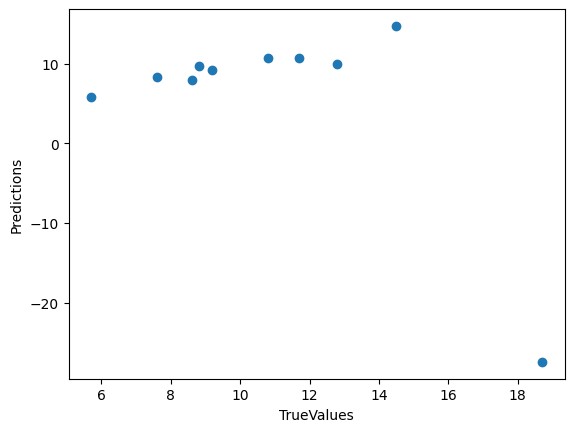

In [ ]:
## The line / model
from matplotlib import pyplot as plt
plt.scatter(y_test, predicted)
plt.xlabel("TrueValues")
plt.ylabel("Predictions")
plt.show()